### Analyze images with CV2: for testing YOLO V5 BB in flickr27 logos dataset

* get height, width from a jpeg image
* plot the image
* plot a BB rectangle on the image (use YOLO v5 format)

In [1]:
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# transform yolov5 in start_point, end_point
# yolo v5 is: <object-class> <xc> <yc> <width> <height>
# where all values are scaled to image width and height (in range 0,1)

def yolo_2_cv2(yolo_bb, image_hgt, image_wdt):
    # yolobb is an array of 4 float number <x> <y> <width> <height>
    assert (len(yolo_bb) == 4)
    
    # image_hgt, image_wdt are in pixels
    
    # compute absolute pixels of center
    xc = int(yolo_bb[0] * image_wdt)
    yc = int(yolo_bb[1] * image_hgt)
    
    half_abs_wdt = int((yolo_bb[2] * image_wdt)/2)
    half_abs_hgt = int((yolo_bb[3] * image_hgt)/2)
    
    start_point = (xc - half_abs_wdt , yc - half_abs_hgt)
    end_point = (xc + half_abs_wdt, yc + half_abs_hgt)
    
    return start_point, end_point

### Plot images

CPU times: user 989 ms, sys: 196 ms, total: 1.19 s
Wall time: 98.1 ms


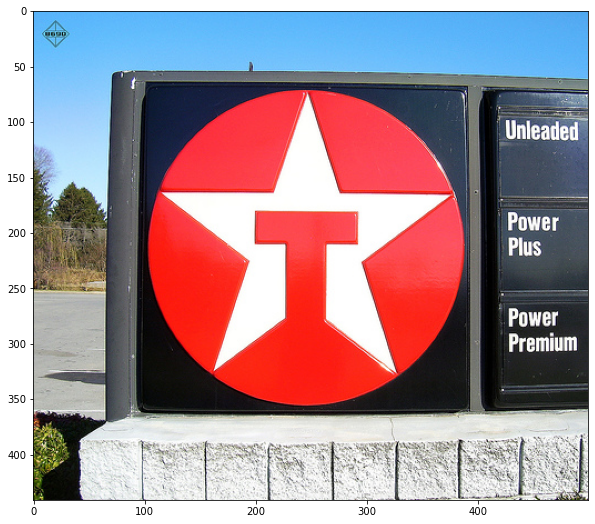

In [3]:
%%time
IMAGES_INPUT_DIR = "flickr_logos_27_dataset_images/"

IMAGE_NAME = IMAGES_INPUT_DIR + "2176584286.jpg"

# read the image from the file
image = cv2.imread(IMAGE_NAME)
# we need it otherwise blue becomes red (checked on Mac). CV2 when read the image use BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 9))
plt.imshow(image);

### Plot a BB rectangle on the image

* the BB is given in the YOLO V5 format

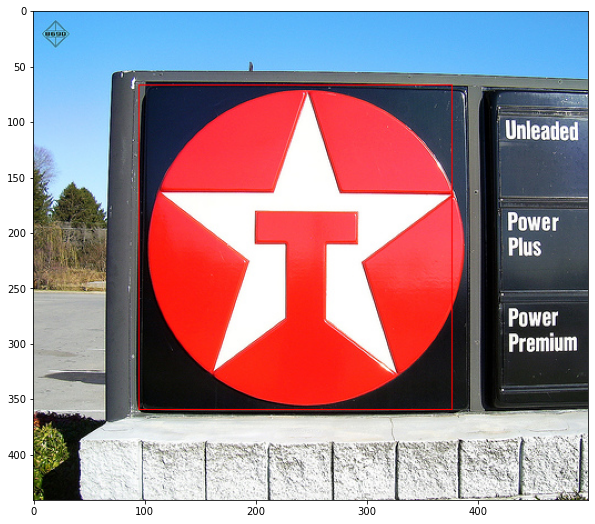

In [4]:
# in YOLO V5 format BB is 0.38358557 0.5676949 0.036231667 0.02308482

# mapping
# x --> w
# y --> h

yoloBB = [0.473, 0.48299319727891155, 0.566, 0.6621315192743764]

# read the image from the file
image = cv2.imread(IMAGE_NAME)
# we need it otherwise blue becomes red (checked on Mac). CV2 when read the image use BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# transform from yolo v5 to cv2
start_point, end_point = yolo_2_cv2(yoloBB, image.shape[0], image.shape[1])

# for plotting
# Red color in RGB (image is already in RGB)
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 1
  
# Using cv2.rectangle() method
# Draw a rectangle with red line borders of thickness of 2 px
image = cv2.rectangle(image, start_point, end_point, color, thickness)

plt.figure(figsize=(12, 9))
plt.imshow(image);